In [11]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
pd.options.mode.chained_assignment = None; ## avoid warning
#from datetime import datetime;
import time;
## time.process_time() to record the time

import os;
from google.colab import drive
drive.mount('/content/drive', force_remount=True);

path = "/content/drive/My Drive/Code Colab/Torch_Tools";
os.chdir(path);
os.listdir(path);

from YZ_torch_tools import YZ_nn_model;
from YZ_torch_tools import YZ_nn_layer;
from YZ_torch_tools import YZ_nn_optimize;

path = "/content/drive/My Drive/Code Colab/Sentiment analysis/CNN";
os.chdir(path);
os.listdir(path);

import torchtext.data as ttd;
from torchtext.vocab import GloVe;

Mounted at /content/drive


# Data acquire!


In [4]:
'''
import torch
import random
import time
import spacy
from torchtext import data
from torchtext import datasets
import torch.nn as nn
import torch.nn.functional as F


SEED = 1
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
#torch.backends.cudnn.deterministic = True
 
TEXT = data.Field(tokenize='spacy')
#TEXT = data.Field();
''''''
TEXT = data.Field(
    sequential = True,
    batch_first = True,
    lower = True,
    #tokenize = 'spacy',
    pad_first = True
)''''''
LABEL = data.LabelField(dtype=torch.float)
#LABEL = data.Field();

#LABEL = data.Field(sequential = False, use_vocab = False, is_target = True);
 

train_data, test_data = datasets.IMDB.splits(TEXT, LABEL);
print("The length of train_data is %s\nThe length of test_data is %s"%(len(train_data), len(test_data)));

train_data, valid_data = train_data.split(random_state=random.seed(SEED))
'''

'\nimport torch\nimport random\nimport time\nimport spacy\nfrom torchtext import data\nfrom torchtext import datasets\nimport torch.nn as nn\nimport torch.nn.functional as F\n\n\nSEED = 1\ntorch.manual_seed(SEED)\ntorch.cuda.manual_seed(SEED)\n#torch.backends.cudnn.deterministic = True\n \nTEXT = data.Field(tokenize=\'spacy\')\n#TEXT = data.Field();\n\nTEXT = data.Field(\n    sequential = True,\n    batch_first = True,\n    lower = True,\n    #tokenize = \'spacy\',\n    pad_first = True\n)\nLABEL = data.LabelField(dtype=torch.float)\n#LABEL = data.Field();\n\n#LABEL = data.Field(sequential = False, use_vocab = False, is_target = True);\n \n\ntrain_data, test_data = datasets.IMDB.splits(TEXT, LABEL);\nprint("The length of train_data is %s\nThe length of test_data is %s"%(len(train_data), len(test_data)));\n\ntrain_data, valid_data = train_data.split(random_state=random.seed(SEED))\n'

In [0]:
df = pd.read_csv('/content/drive/My Drive/Code Colab/Sentiment analysis/CNN/IMDB Dataset.csv');

df['binary_labels'] = df['sentiment'].map({'negative':0, 'positive':1});
df2 = df[['binary_labels','review']];

df2.to_csv('IMDB_NN_set.csv', index = False);

K_class = 2;



In [14]:
TEXT = ttd.Field(
    sequential = True,
    batch_first = True,
    lower = True,
    #tokenize = 'spacy',
    pad_first = True
)
LABEL = ttd.Field(sequential = False, use_vocab = False, is_target = True);
dataset = ttd.TabularDataset(path = 'IMDB_NN_set.csv', format = 'csv',
                             skip_header = True,
                             fields = [('label', LABEL),('data', TEXT)] 
                             ## it will generate an obj dattset.example.data
                             ## and an obj dattset.example.label
                             );

train_dataset, test_dataset = dataset.split(0.7);## default 0.7 here
TEXT.build_vocab(train_dataset);
vocab = TEXT.vocab;
print(len(vocab));
#vocab.stoi
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu");
print(device);

train_iter, test_iter = ttd.Iterator.splits(
    (train_dataset, test_dataset), 
    sort_key = lambda x: len(x.data), ## x is this object
    batch_sizes = (32,1000),
    device = device
    );
print(len(train_dataset));
print(len(test_dataset));

313131
cuda:0
35000
15000


## CNN

Doing a classification with 2 label(s)!
Epoch (1 / 10)...Train_Loss: 6.907e-01...Test_loss: 6.662e-01...Duration: 1.611e+01 sec
Epoch (2 / 10)...Train_Loss: 5.964e-01...Test_loss: 5.352e-01...Duration: 3.221e+01 sec
Epoch (3 / 10)...Train_Loss: 4.813e-01...Test_loss: 4.760e-01...Duration: 4.828e+01 sec
Epoch (4 / 10)...Train_Loss: 4.110e-01...Test_loss: 4.635e-01...Duration: 6.438e+01 sec
Epoch (5 / 10)...Train_Loss: 3.594e-01...Test_loss: 4.057e-01...Duration: 8.046e+01 sec
Epoch (6 / 10)...Train_Loss: 3.143e-01...Test_loss: 4.008e-01...Duration: 9.654e+01 sec
Epoch (7 / 10)...Train_Loss: 2.783e-01...Test_loss: 4.679e-01...Duration: 1.127e+02 sec
Epoch (8 / 10)...Train_Loss: 2.426e-01...Test_loss: 3.855e-01...Duration: 1.287e+02 sec
Epoch (9 / 10)...Train_Loss: 2.131e-01...Test_loss: 4.087e-01...Duration: 1.448e+02 sec
Epoch (10 / 10)...Train_Loss: 1.913e-01...Test_loss: 4.526e-01...Duration: 1.616e+02 sec
Yizhou said 欲速则不达，施主稍安勿躁: | ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 

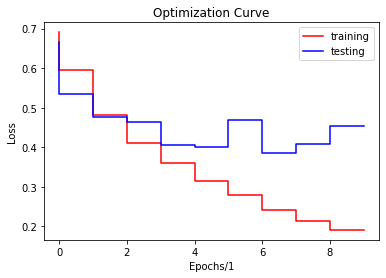

In [61]:
Embed_dim = 20;
embed_layer = [["Embedding",Embed_dim]];
conv_layer = [["Permute"],["Conv1d",32,3,2],
              ["ReLU"],["Dropout", 0.25],["MaxPool1d",2],["Conv1d",64,3,2],
               ["ReLU"],["Dropout", 0.25],["MaxPool1d",2], ["Conv1d",128,3,2],
              ["ReLU"],["Dropout", 0.25],["Permute"], ["Torch_max", 1]];
ann_layer = [["Linear", 64],["ReLU"], ["Dropout", 0.25],["Linear", 32],
             ["ReLU"], ["Dropout", 0.25], ["Linear", K_class],["Softmax"]];
ann_layer = [["Linear", K_class]];

LD = YZ_nn_layer(len(vocab));
LD.YZ_nn_sequential(embed_layer);
LD.YZ_nn_sequential(conv_layer);
LD.YZ_nn_sequential(ann_layer);
#LD.Show();

YZ_model = YZ_nn_model(LD.Seq);  
YZ_train = YZ_nn_optimize(YZ_model, train_iter, test_iter, K_class = K_class);
YZ_train.Optimizing(lr = 4e-4, epochs = 10, plot_epoch = 1);          

## LSTM RNN

In [0]:
class nn_LSTM(nn.Module):
    def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs, device):
        super(nn_LSTM,self).__init__();
        self.V = n_vocab;
        self.D = embed_dim;
        self.M = n_hidden;
        self.K = n_outputs;
        self.L = n_rnnlayers;

        self.device = device;

        self.embed = nn.Embedding(self.V, self.D);
        self.rnn = nn.LSTM(
            input_size = self.D,
            hidden_size = self.M,
            num_layers = self.L,
            batch_first = True,
            dropout = 0.25
        );

        self.drop = nn.Dropout(0.25);

        self.softmax = nn.Softmax(dim=1);
        self.fc = nn.Linear(self.M,self.K);

    def forward(self, X):
        ## init hidden states
        h0 = torch.zeros(self.L, X.size(0), self.M).to(self.device);
        c0 = torch.zeros(self.L, X.size(0), self.M).to(self.device);
        #h0 = torch.zeros(self.L, X.size(0), self.M);
        #c0 = torch.zeros(self.L, X.size(0), self.M);

        ## embedding layer
        ## words index 2 into word vectors
        out = self.embed(X);

        ## get rnn unit output
        out,_ = self.rnn(out, (h0,c0));

        ## max pool
        out,_ = torch.max(out,1);
        ## we only need h(T) finally

        out = self.drop(out);
        out = self.fc(out);
        #out = self.softmax(out);
        return out;

In [49]:

V = len(vocab);
D = 20;
M = 12;
L = 1;
LD = YZ_nn_layer(V);
LD.Insert_Seq([1,nn_LSTM(V,D,  M, L ,K_class, device)],V, K_class)

LD.Show();

[['YIZHOU_layer', Sequential(
  (0): Costum_module_mono_out(
    (mod): nn_LSTM(
      (embed): Embedding(313131, 20)
      (rnn): LSTM(20, 12, batch_first=True, dropout=0.25)
      (drop): Dropout(p=0.25, inplace=False)
      (softmax): Softmax(dim=1)
      (fc): Linear(in_features=12, out_features=2, bias=True)
    )
  )
)]]


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Doing a classification with 2 label(s)!
Epoch (1 / 10)...Train_Loss: 6.938e-01...Test_loss: 6.828e-01...Duration: 3.188e+01 sec
Epoch (2 / 10)...Train_Loss: 6.558e-01...Test_loss: 6.116e-01...Duration: 6.365e+01 sec
Epoch (3 / 10)...Train_Loss: 5.433e-01...Test_loss: 5.180e-01...Duration: 9.551e+01 sec
Epoch (4 / 10)...Train_Loss: 4.551e-01...Test_loss: 4.683e-01...Duration: 1.276e+02 sec
Epoch (5 / 10)...Train_Loss: 3.978e-01...Test_loss: 4.437e-01...Duration: 1.592e+02 sec
Epoch (6 / 10)...Train_Loss: 3.464e-01...Test_loss: 4.318e-01...Duration: 1.912e+02 sec
Epoch (7 / 10)...Train_Loss: 3.052e-01...Test_loss: 4.166e-01...Duration: 2.236e+02 sec
Epoch (8 / 10)...Train_Loss: 2.684e-01...Test_loss: 4.153e-01...Duration: 2.565e+02 sec
Epoch (9 / 10)...Train_Loss: 2.340e-01...Test_loss: 4.198e-01...Duration: 2.888e+02 sec
Epoch (10 / 10)...Train_Loss: 2.064e-01...Test_loss: 4.223e-01...Duration: 3.211e+02 sec
Yizhou said 欲速则不达，施主稍安勿躁: | ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 

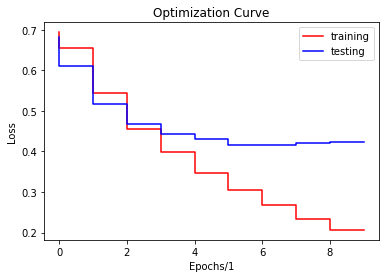

In [50]:
lr = 5e-4;
YZ_model2 = YZ_nn_model(LD.Seq);

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu");
criterion = nn.BCEWithLogitsLoss(); ## Python can even return a function
optimizer = torch.optim.Adam(YZ_model2.parameters(),lr=lr);

YZ_train2 = YZ_nn_optimize(YZ_model2, train_iter, test_iter, device = False, K_class = K_class);
YZ_train2.Optimizing(lr=lr, criterion = criterion, optimizer = False, epochs = 10, plot_epoch = 1);